<a href="https://colab.research.google.com/github/truptiwagh13/ML-3-PR-codes/blob/main/2nd_PR_comparison_between_greedy_and_epsilon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

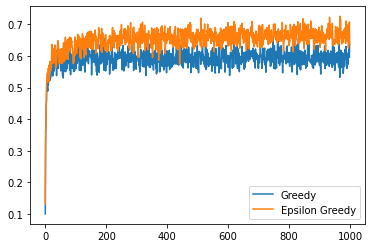

In [1]:
import numpy as np
 
# Define a bandit problem with 3 arms, each with a different mean reward
arms = 3
bandit = np.array([0.1, 0.5, 0.9])
 
# Define the number of plays and the number of experiments to run
plays = 1000
experiments = 2000
 
# Define the Greedy policy
def greedy(Q):
    return np.argmax(Q)
 
# Define the Epsilon Greedy policy
def epsilon_greedy(Q, epsilon):
    if np.random.random() < epsilon:
        return np.random.randint(len(Q))
    else:
        return np.argmax(Q)
 
# Run the experiments with the Greedy policy
rewards_greedy = np.zeros((experiments, plays))
for i in range(experiments):
    Q = np.zeros(arms)
    for j in range(plays):
        arm = greedy(Q)
        reward = np.random.normal(bandit[arm], 1)
        Q[arm] = Q[arm] + (1 / (j+1)) * (reward - Q[arm])
        rewards_greedy[i][j] = reward
 
# Run the experiments with the Epsilon Greedy policy
rewards_epsilon_greedy = np.zeros((experiments, plays))
for i in range(experiments):
    Q = np.zeros(arms)
    for j in range(plays):
        arm = epsilon_greedy(Q, 0.1)
        reward = np.random.normal(bandit[arm], 1)
        Q[arm] = Q[arm] + (1 / (j+1)) * (reward - Q[arm])
        rewards_epsilon_greedy[i][j] = reward
 
# Calculate the average rewards for each policy and plot the results
avg_rewards_greedy = np.mean(rewards_greedy, axis=0)
avg_rewards_epsilon_greedy = np.mean(rewards_epsilon_greedy, axis=0)
 
import matplotlib.pyplot as plt
 
plt.plot(avg_rewards_greedy, label='Greedy')
plt.plot(avg_rewards_epsilon_greedy, label='Epsilon Greedy')
plt.legend()
plt.show()
 
 
